<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/Naive%20Bayes(CAC1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___
#Naive Bayes
___

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

* **Naïve:** It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

* **Bayes:** It is called Bayes because it depends on the principle of Bayes' Theorem.

Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn


### Reading the dataset

In [ ]:
dataset = pd.read_csv('/content/NASA_OrbitingBodies.csv')

x = dataset.iloc[:, [3, 5]].values
y = dataset.iloc[:, 6].values

dataset

# Database Description
# https://www.kaggle.com/datasets/nasaresearcher/asteroid-features-for-hazardous-prediction-nasa

,Id,Name,Estimated Diameter,Diameter Category,Relative Velocity,Velocity Cayegory,Hazardous
0,2162635,162635 (2000 SS164),2.679415,Too High,13569.24922,Too Low,False
1,2277475,277475 (2005 WK4),0.594347,Too High,73588.72666,Too High,True
2,2512244,512244 (2015 YE18),1.614507,Too High,114258.69210,Too High,False
3,3596030,(2012 BV13),0.215794,High,24764.30314,Too Low,False
4,3667127,(2014 GE35),0.570217,Too High,42737.73376,Low,True
...,...,...,...,...,...,...,...
1495,3623682,(2013 AF53),0.029788,Too Low,29246.86613,Too Low,False
1496,3789124,(2017 VD2),0.297879,High,53337.88160,High,False
1497,3842597,(2019 KN2),0.022596,Too Low,49376.05522,High,False
1498,3879292,(2019 UN2),0.054205,Low,27317.89329,Too Low,False


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1500 non-null   int64  
 1   Name                1500 non-null   object 
 2   Estimated Diameter  1500 non-null   float64
 3   Diameter Category   1500 non-null   object 
 4   Relative Velocity   1500 non-null   float64
 5   Velocity Cayegory   1500 non-null   object 
 6   Hazardous           1500 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 71.9+ KB


####Printing x and y before encoding

In [ ]:
print(x)

[['Too High' 'Too Low']
 ['Too High' 'Too High']
 ['Too High' 'Too High']
 ...
 ['Too Low' 'High']
 ['Low' 'Too Low']
 ['Too High' 'Low']]


In [ ]:
print(y)

[False  True False ... False False False]


**Encoding character values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
y= le.fit_transform(y)

####Printing x and y after encoding

In [ ]:
print(x)

[[2 3]
 [2 2]
 [2 2]
 ...
 [3 0]
 [1 3]
 [2 1]]


In [ ]:
print(y)

[0 1 0 ... 0 0 0]


### Splitting the dataset into the Training set and Test set 

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0) 

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [ ]:
x_train

array([[ 0.42429098,  0.43698699],
       [ 1.33163421,  1.33490546],
       [ 0.42429098,  0.43698699],
       ...,
       [ 1.33163421,  1.33490546],
       [-1.39039549,  0.43698699],
       [-0.48305226,  1.33490546]])

###Train Gaussian Naive Bayes classifier 


In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 

GaussianNB()

####Predict output for the test set and compare with the existing Y value

In [ ]:
y_pred = classifier.predict(x_test)
print (y_pred)
print (y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 

###Accuracy Score

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

ac = accuracy_score(y_test,y_pred)
print (ac)

0.8777777777777778


###Confusion matrix / ROC

In [ ]:
from sklearn.metrics import confusion_matrix  

cm=confusion_matrix(y_test,y_pred)
print (cm)

[[395   0]
 [ 55   0]]


###Visualization

####Training Data

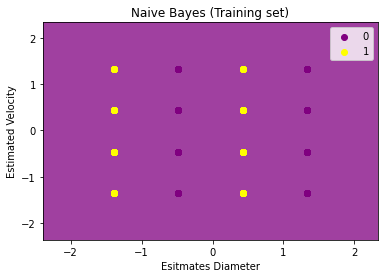

In [ ]:
import matplotlib.pyplot as mtp 
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('purple', 'yellow')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],color = ListedColormap(('purple', 'yellow'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('Esitmates Diameter')  
mtp.ylabel('Estimated Velocity')  
mtp.legend()  
mtp.show() 

####Test Data

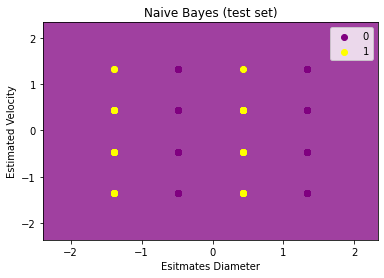

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'yellow')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                color = ListedColormap(('purple', 'yellow'))(i), label = j)  
mtp.title('Naive Bayes (test set)')  
mtp.xlabel('Esitmates Diameter')  
mtp.ylabel('Estimated Velocity')  
mtp.legend()  
mtp.show() 

##Conclusion

###DataSet
To demonstrate Naive Bayes Classifier I have used a dataset from NASA which lists out few Earth orbiting bodies with their name,esitimated diameters and velocities. The size of the data set is 1500x7. Based on diameter and velocities of bodies, we predict if they is Hazardous to Earth or Not.


###Encoding
Since the Last column (i.e. Hazardous) is boolean in nature that's why we need to encode it to convert it into numeric.


###Inference
After Spliting, Scaling and Training we can see that the accuracy in results is 87.77% and Confusion matrix is [[395   0][ 55   0]] which shows that 0+55=55 values out of 4500 were wrongly predicted.


###Graph
The yellow dots in both the Scatter plots represent all the hazardous orbiting bodies while the purple dots represent all the safe (non-hazardous) ones.